<a href="https://colab.research.google.com/github/JyotiSingh0996/2nd-Capstone-project-ML-Regression-/blob/main/Naive_Bayes_Classifier_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.columns = ['label','message']

In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
df.shape

(5572, 2)

In [ ]:
df['label'].value_counts()

ham     4825
spam    747 
Name: label, dtype: int64

In [ ]:
df['length'] = df['message'].apply(len)

In [ ]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


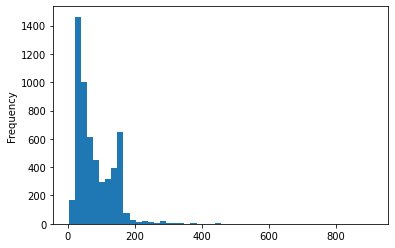

In [ ]:
df['length'].plot(bins=50,kind='hist')

In [ ]:
df['length'].max()

910

In [ ]:
df.describe(include='all')

,label,message,length
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.118808
std,NaN,NaN,59.690841
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,61.000000
75%,NaN,NaN,121.000000


In [ ]:
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords 

In [ ]:
#def text_process(msg):
  #nopunc = [char for char in msg if char not in string.punctuation]
  #nopunc=''.join(nopunc)
  #return''.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


In [ ]:
#pd.set_option('display.max_colwidth', -1)

In [ ]:
#df['tokenized_message'] = df['message'].apply(text_process)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#del vectorizer

In [ ]:
#vectorizer = CountVectorizer(max_df=0.9, min_df= 10) 
#X = vectorizer.fit_transform(df['tokenized_message'])

In [ ]:
#print(vectorizer.get_feature_names())

In [ ]:
#len(vectorizer.get_feature_names())

In [ ]:
#X.toarray()[4560]

In [ ]:
#sum(X.toarray()[4560])

In [ ]:
#print(vectorizer.get_feature_names()[3671])
#print(vectorizer.get_feature_names()[4560])

In [ ]:
import re

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df['message_clean'] = df['message'].apply(clean_text)
df.head()

,label,message,length,message_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,free entry in a wkly comp to win fa cup final tkts may text fa to to receive entry questionstd txt ratetcs apply
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,nah i dont think he goes to usf he lives around here though


In [ ]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['message_clean'] = df['message_clean'].apply(remove_stopwords)
df.head()

,label,message,length,message_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,free entry wkly comp win fa cup final tkts may text fa receive entry questionstd txt ratetcs apply
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,nah dont think goes usf lives around though


In [ ]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [ ]:
df['message_clean'] = df['message_clean'].apply(stemm_text)
df.head()

,label,message,length,message_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,free entri wkli comp win fa cup final tkts may text fa receiv entri questionstd txt ratetc appli
3,ham,U dun say so early hor... U c already then say...,49,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,nah dont think goe usf live around though


In [ ]:
def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    # Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    
    return text

In [ ]:
df['message_clean'] = df['message_clean'].apply(preprocess_data)
df.head()

,label,message,length,message_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,free entri wkli comp win fa cup final tkts may text fa receiv entri questionstd txt ratetc appli
3,ham,U dun say so early hor... U c already then say...,49,dun say ear hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,nah dont think goe usf live around though


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['label'])

df['label_encoded'] = le.transform(df['label'])
df.head()

,label,message,length,message_clean,label_encoded
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,0
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,free entri wkli comp win fa cup final tkts may text fa receiv entri questionstd txt ratetc appli,1
3,ham,U dun say so early hor... U c already then say...,49,dun say ear hor alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,nah dont think goe usf live around though,0


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

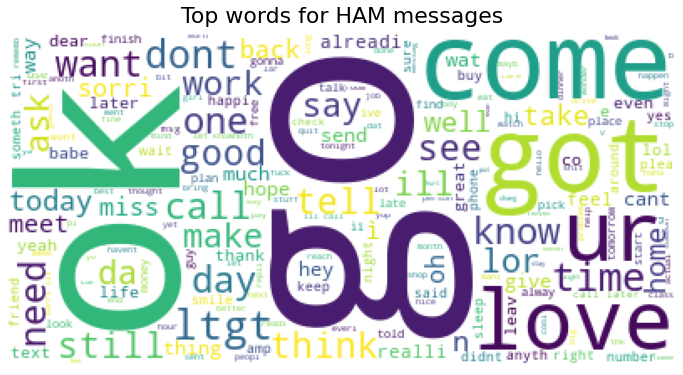

In [ ]:

#twitter_mask = np.array(Image.open('/kaggle/input/masksforwordclouds/twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    
)
wc.generate(' '.join(text for text in df.loc[df['label'] == 'ham', 'message_clean']))
plt.figure(figsize=(12,8))
plt.title('Top words for HAM messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

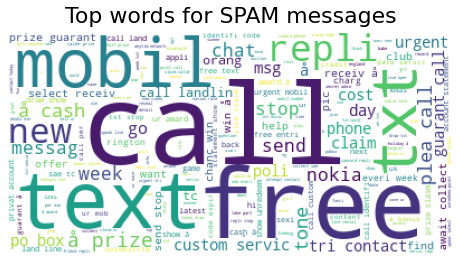

In [ ]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
    
)
wc.generate(' '.join(text for text in df.loc[df['label'] == 'spam', 'message_clean']))
plt.figure(figsize=(8,6))
plt.title('Top words for SPAM messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
X=df['message_clean']
y=df['label_encoded']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

4179 4179
1393 1393


In [ ]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [ ]:
x_train_dtm = vect.transform(X_train)
x_test_dtm = vect.transform(X_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf


<4179x5684 sparse matrix of type '<class 'numpy.float64'>'
	with 32201 stored elements in Compressed Sparse Row format>

In [ ]:
texts = df['message_clean']
target = df['label_encoded']

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

6726

In [ ]:
import tensorflow as tf


In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
from keras.preprocessing.text import Tokenizer


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
X_train_tfidf.shape

(4179, 5684)

In [ ]:
X_test_tfidf.shape

(1393, 5684)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naves_tf = GaussianNB()

In [ ]:
train_array = X_train_tfidf.toarray()
test_array = X_test_tfidf.toarray()

In [ ]:
train_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_array.shape

(1393, 5684)

In [ ]:
naves_tf.fit(train_array,y_train)

GaussianNB()

In [ ]:
train_preds = naves_tf.predict(train_array)
test_preds = naves_tf.predict(test_array)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(train_preds,y_train))
print(confusion_matrix(test_preds,y_test))

[[3348    0]
 [ 275  556]]
[[1035   29]
 [ 167  162]]


In [ ]:
print(classification_report(train_preds,y_train))
print("\n")
print(classification_report(test_preds,y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3348
           1       1.00      0.67      0.80       831

    accuracy                           0.93      4179
   macro avg       0.96      0.83      0.88      4179
weighted avg       0.94      0.93      0.93      4179



              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1064
           1       0.85      0.49      0.62       329

    accuracy                           0.86      1393
   macro avg       0.85      0.73      0.77      1393
weighted avg       0.86      0.86      0.84      1393

